# No

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# read out_LED.csv as dataframe
og_df = pd.read_csv('../out_LED.csv')

# chose non repeat trials - 0 or 2 or missing
df = og_df[ og_df['repeat_trial'].isin([0,2]) | og_df['repeat_trial'].isna() ]

# only session type 7
session_type = 7    
df = df[ df['session_type'].isin([session_type]) ]

# training level 16
training_level = 16
df = df[ df['training_level'].isin([training_level]) ]

In [3]:
df.loc[:, 'RT'] = df['timed_fix'] - df['intended_fix']

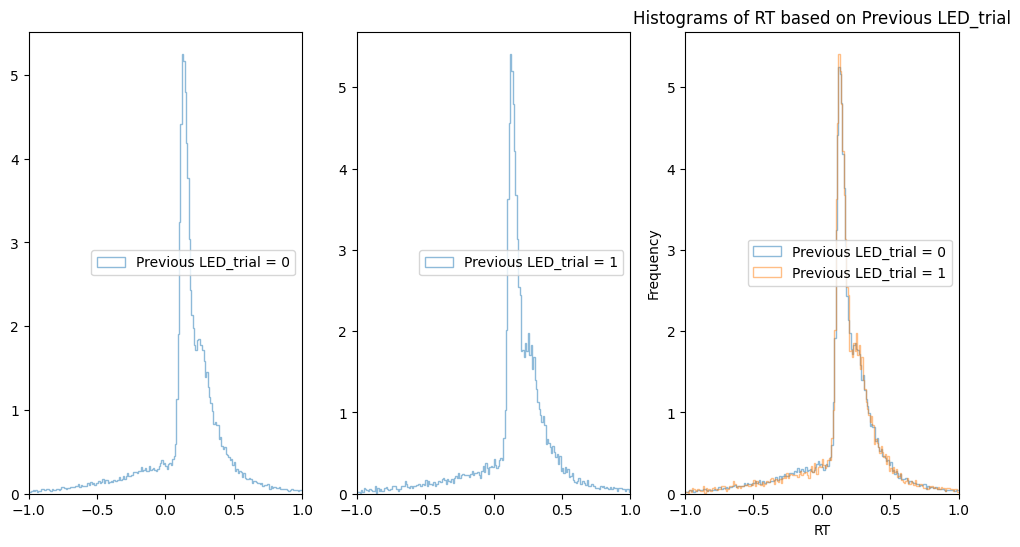

In [11]:
# Add a shifted column for LED_trial of the previous trial

df['LED_trial_prev'] = df['LED_trial'].shift(1)
df['trial_prev'] = df['trial'].shift(1)

# Filter rows where LED_trial == 0
data = df[df['LED_trial'] == 0]

# Subset where previous trial's LED_trial is 0
subset_0 = data[(data['trial_prev'] == data['trial'] - 1) & (data['LED_trial_prev'] == 0)]

# Subset where previous trial's LED_trial is 1
subset_1 = data[(data['trial_prev'] == data['trial'] - 1) & (data['LED_trial_prev'] == 1)]

bins=np.arange(-2,2,0.01)
# Plot histograms
plt.figure(figsize=(12, 6))

# Histogram for subset_0
plt.subplot(1, 3, 1)
plt.hist(subset_0['RT'], bins=bins, alpha=0.5, label='Previous LED_trial = 0', histtype='step', density=True)
plt.xlim(-1,1)
plt.legend()

# Histogram for subset_1
plt.subplot(1, 3, 2)
plt.hist(subset_1['RT'], bins=bins, alpha=0.5, label='Previous LED_trial = 1', histtype='step',density=True)
plt.xlim(-1,1)
plt.legend()

plt.subplot(1, 3, 3)
plt.hist(subset_0['RT'], bins=bins, alpha=0.5, label='Previous LED_trial = 0', histtype='step', density=True)
plt.hist(subset_1['RT'], bins=bins, alpha=0.5, label='Previous LED_trial = 1', histtype='step', density=True)
plt.xlim(-1,1)
plt.legend()

# Add labels, legend, and title
plt.xlabel('RT')
plt.ylabel('Frequency')
plt.title('Histograms of RT based on Previous LED_trial')
plt.legend()

# Show plot
plt.show()


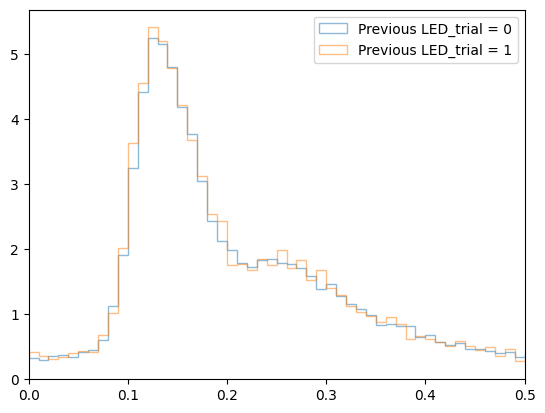

In [15]:
plt.hist(subset_0['RT'], bins=bins, alpha=0.5, label='Previous LED_trial = 0', histtype='step', density=True)
plt.hist(subset_1['RT'], bins=bins, alpha=0.5, label='Previous LED_trial = 1', histtype='step', density=True)
plt.xlim(0,0.5)
plt.legend()